# Predicting House Prices of Buenos Aires City

## Dataset
Each record of this dataset corresponds to a property for sale.

### Features
A description of the features can be found below:

|Feature|Description|
|:------|:----------|
|id|id de la propiedad|
|created_on|Date of publishment on website|
|operation|Rent, sell|
|property_type|House, Apartament, PentHouse, etc|
|place_with_parent_names|Name of the property location|
|lat-lon|Concatenated coordinates|
|lat|latitude|
|lon|longitude|
|price|Price|
|currency|Currency used by publisher|
|price_aprox_usd|Aprox price in USD|
|surface_total_in_m2|Total surface*|
|surface_covered_in_m2|Covered surface*|
|price_usd_per_m2|Price per unit area\*\*|
|floor|Number of floors|
|rooms|Number of rooms|
|expenses|Expenses|
|properati_url|Property URL on Properati website|
|barrio|Neighborhood|
|comuna|Number of the sector in which property is located|

<center><i>*squared meters<br>
** USD per squared meter</i></center>

## Libraries & Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

%matplotlib inline
pd.set_option('precision', 1)
pd.set_option('max_columns', 50)
pd.set_option('max_colwidth', 5000)
pd.set_option('display.max_rows', 100)

sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (10,5)
sns.set_style("whitegrid", {'axes.grid' : False})

## Dataset Loading

In [2]:
df = pd.read_csv("dataset/data_properati.csv", parse_dates = ['created_on'])
df.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.6,-58.4,2.0e+06,312.0,NaN,6410.3,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.6,-58.4,7.9e+05,121.0,121.0,6528.9,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.6,-58.4,3.4e+05,122.0,108.0,2811.5,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.6,-58.4,1.4e+05,24.0,24.0,6041.7,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.6,-58.4,1.8e+05,24.0,24.0,7291.7,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0


# Exploratory Data Analysis

## Dataset Metadata

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   created_on               18979 non-null  datetime64[ns]
 1   operation                18979 non-null  object        
 2   property_type            18979 non-null  object        
 3   place_with_parent_names  18979 non-null  object        
 4   lat-lon                  18979 non-null  object        
 5   lat                      18979 non-null  float64       
 6   lon                      18979 non-null  float64       
 7   price_aprox_usd          17445 non-null  float64       
 8   surface_total_in_m2      16586 non-null  float64       
 9   surface_covered_in_m2    16876 non-null  float64       
 10  price_usd_per_m2         16037 non-null  float64       
 11  floor                    2756 non-null   float64       
 12  rooms                    13517 n

## Dataset size

In [4]:
print(f'DataFrame has {df.shape[0]} records and {df.shape[1]} features.')

DataFrame has 18979 records and 17 features.


## Columns in Dataset

In [5]:
df.columns.values

array(['created_on', 'operation', 'property_type',
       'place_with_parent_names', 'lat-lon', 'lat', 'lon',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'barrio', 'comuna'], dtype=object)

The current project is focused on *Family Housing*, then only records of *apartment, house & PH* will be kept.  

In [6]:
mask = ['house','PH','apartment']
df = df[df.property_type.isin(mask)]

## Statistical Summary

In [7]:
df.describe()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,comuna
count,1.8e+04,1.8e+04,1.7e+04,15691.0,15968.0,15207.0,2720.0,13407.0,3.7e+03,17888.0
mean,-3.5e+01,-5.8e+01,2.9e+05,138.1,119.1,2748.9,11.1,3.0,4.9e+03,8.0
std,2.7e-02,4.1e-02,3.9e+05,1778.5,1540.2,1863.8,53.7,1.7,3.1e+04,5.0
min,-3.5e+01,-5.9e+01,5.0e+03,0.0,1.0,1.0,1.0,1.0,1.0e+00,1.0
25%,-3.5e+01,-5.8e+01,1.2e+05,48.0,43.0,2000.0,2.0,2.0,1.6e+03,3.0
50%,-3.5e+01,-5.8e+01,1.8e+05,74.0,66.0,2555.6,4.0,3.0,2.8e+03,8.0
75%,-3.5e+01,-5.8e+01,3.1e+05,130.0,111.0,3160.9,8.0,4.0,5.1e+03,13.0
max,-3.5e+01,-5.8e+01,1.2e+07,184000.0,150000.0,142450.1,904.0,30.0,1.8e+06,15.0


## Correlation

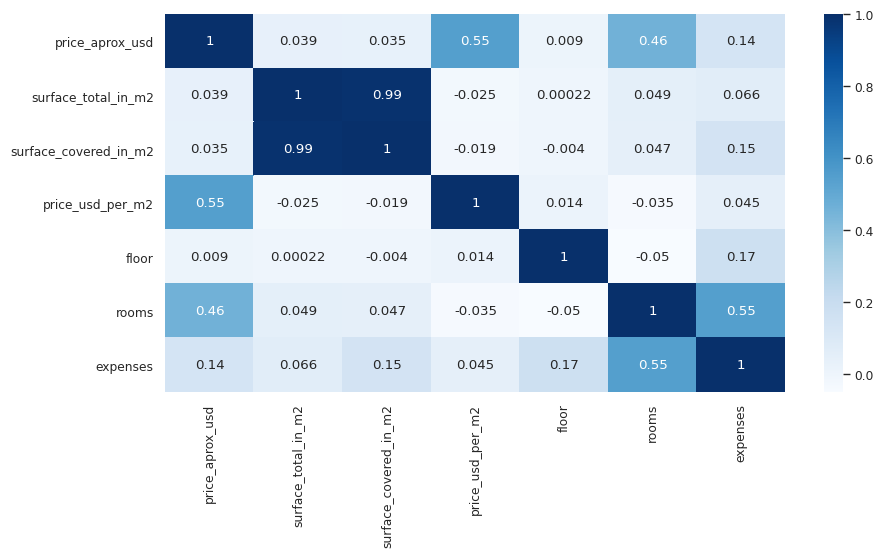

In [8]:
sns.heatmap(df.drop(['lat','lon','comuna'], axis = 1).corr(), annot = True, cmap = "Blues")
plt.show()

A strong correlation between `surface_total_in_m2` and `surface_covered_in_m2` has been noticed according to correlation matrix.

## Duplicates

In [9]:
df[df.duplicated()].count().rename_axis('Feature').to_frame('Count')

,Count
Feature,
created_on,0
operation,0
property_type,0
place_with_parent_names,0
lat-lon,0
lat,0
lon,0
price_aprox_usd,0
surface_total_in_m2,0


No duplicated records were found.

## Missing Values

In [10]:
df.isnull().sum()[df.isnull().sum()>0].rename_axis("Feature", axis=0).to_frame("% Missing Values")/len(df)*100

,% Missing Values
Feature,
price_aprox_usd,7.7
surface_total_in_m2,12.3
surface_covered_in_m2,10.7
price_usd_per_m2,15.0
floor,84.8
rooms,25.1
expenses,79.3


The null values in target variable `price_aprox_usd` will be dropped.

In [11]:
df.dropna(subset = ['price_aprox_usd'], axis = 0, inplace = True)

The null values in `surface_total_in_m2`,`surface_covered_in_m2`,`rooms`,`price_aprox_usd` & `price_usd_per_m2` will be dropped.

In [12]:
df.isnull().sum()[df.isnull().sum()>0].rename_axis("Feature", axis=0).to_frame("% Missing Values")/len(df)*100

,% Missing Values
Feature,
surface_total_in_m2,7.8
surface_covered_in_m2,6.2
price_usd_per_m2,7.9
floor,84.1
rooms,21.3
expenses,78.1


The missing records in `surface_total_in_m2` can be imputed and the `price_usd_per_m2` calculated as follows:  

$$ price{\_}usd{\_}per{\_}m^2 = \frac{price{\_}aprox{\_}usd}{surface{\_}total{\_}in{\_}m^2}$$

These tasks will be carried out in the **Feature Engineering** section.

## Graphical Analysis

### House amenities

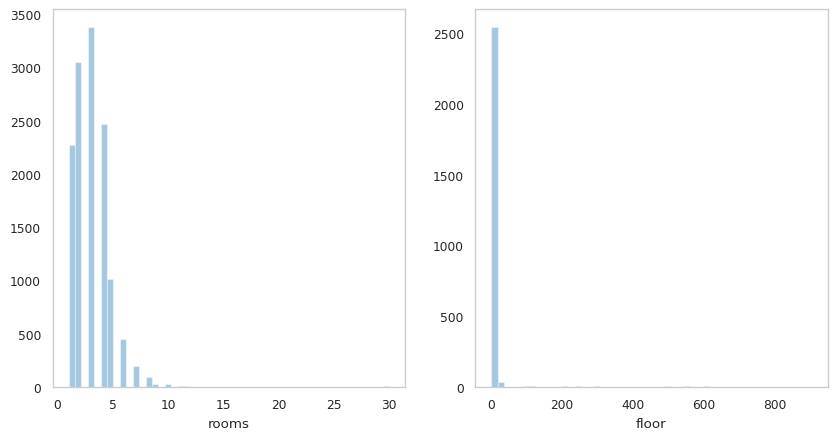

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
sns.distplot(df['rooms'], kde= False, ax = ax[0])
sns.distplot(df['floor'], kde= False, ax = ax[1])
plt.show()

Inconsistent values can be found in both variables, both cases will be analyzed further in the **Data Cleaning** section.

### Price Features

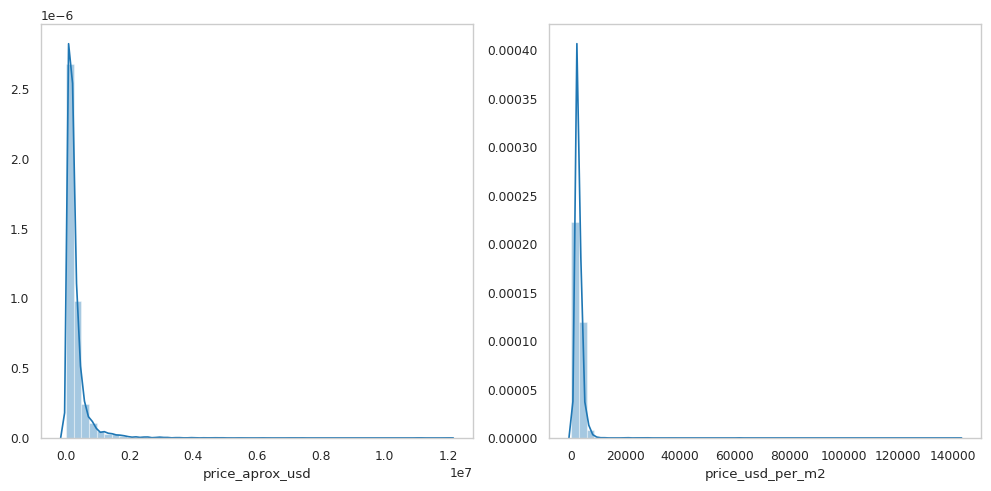

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
sns.distplot(df['price_aprox_usd'], ax = ax[0])
sns.distplot(df['price_usd_per_m2'], ax = ax[1])
plt.tight_layout()
plt.show()

### Surface Features

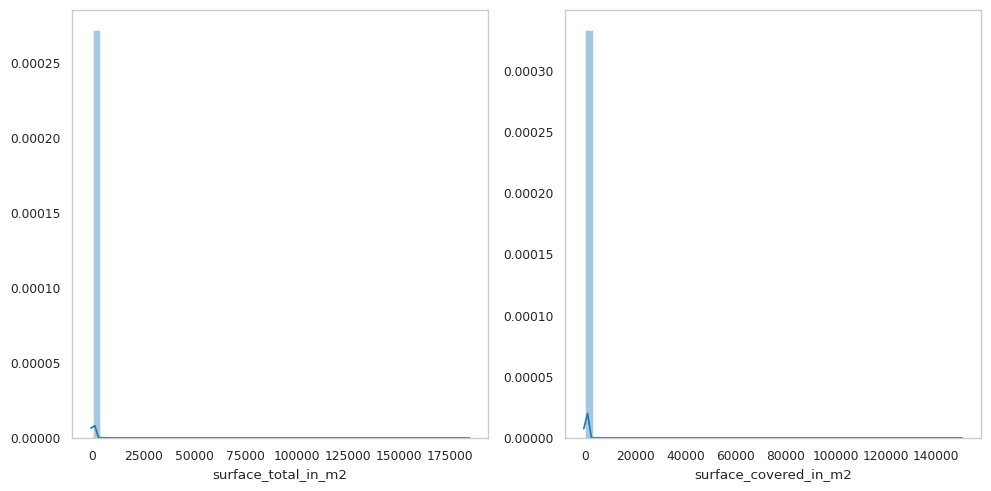

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
sns.distplot(df['surface_total_in_m2'], ax = ax[0])
sns.distplot(df['surface_covered_in_m2'], ax = ax[1])
plt.tight_layout()
plt.show()

The features `surface_total_in_m2` and `surface_covered_in_m2` are strongly correlated as stated before. Let's check the relationship between both features as well as differentiate this one according to the `property_type`.

Due to the presence of outliers in both variables the axis were cut to make easier to appreciate the correlation.

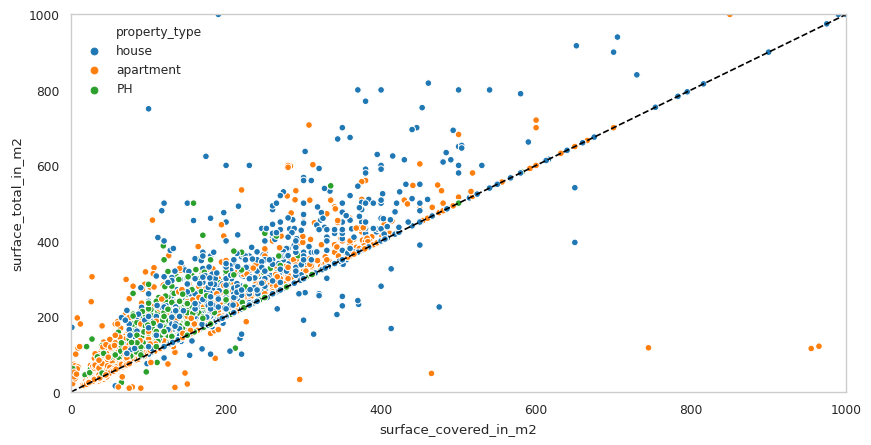

In [16]:
sns.scatterplot(x = 'surface_covered_in_m2', y = 'surface_total_in_m2', hue = 'property_type', data = df)
plt.plot([0, 1000], [0, 1000], 'k--')
plt.legend(frameon=False)
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.show()

The dashed black line corresponds to the scenario where the `surface_covered_in_m2` = `surface_total_in_m2`. Some values are below this line showing some inconsistencies in the features, where `surface_covered_in_m2` > `surface_total_in_m2`. We will analize this scenario further as follows.

In [17]:
wrong_surface_rows = df[df['surface_total_in_m2'] < df['surface_covered_in_m2']]
print(f"There are {len(wrong_surface_rows)} inconsistent area records.")

There are 109 inconsistent area records.


These records will not be deleted but their values will be swapped.

In [18]:
df.at[wrong_surface_rows.index, 'surface_total_in_m2'] = wrong_surface_rows.surface_covered_in_m2
df.at[wrong_surface_rows.index, 'surface_covered_in_m2'] = wrong_surface_rows.surface_total_in_m2

The real state company do not have the real coordinates for each propertys, then they use a central point of the neighborhood or reference point, e.g. Obelisco. The properties sharing the same location will be checked as follows:

In [19]:
count_coord = df.groupby(['lat', 'lon']).size()
count_coord[count_coord > 1].sort_values(ascending = False).head(10).to_frame('Count')

Count
lat   lon         
-34.6 -58.4    152
      -58.4    121
      -58.5     82
      -58.4     47
      -58.4     44
      -58.4     40
      -58.4     38
      -58.4     35
      -58.4     32
      -58.4     31

The real state company suggested to keep the locations with no more than five properties sharing it.

In [20]:
count_coord.name = 'rep_coord'
df = df.join(count_coord, on=['lat', 'lon'])
df = df[df.rep_coord <= 5]
df.drop('rep_coord', inplace = True, axis = 1)

### Property Type
In the **Surface Features** section the distibution of the `property_type` feature can be barely noticed, then an individual analysis of this feature distribution will be carried out as follows.

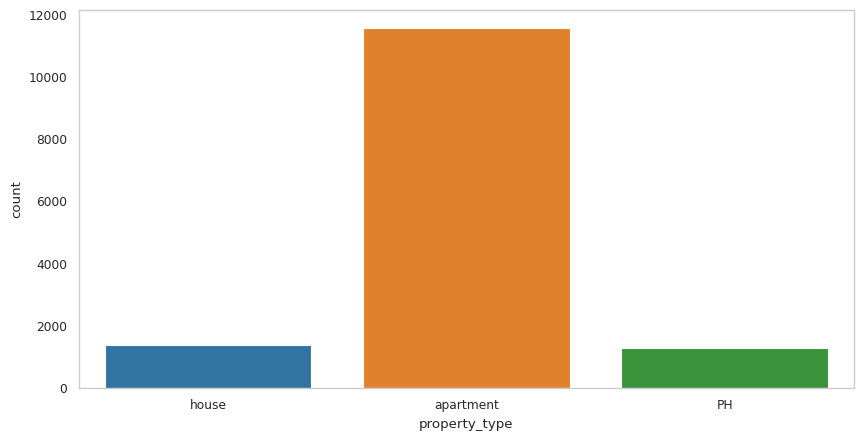

In [21]:
sns.countplot(df['property_type'])
plt.show()

Most of the records of the current dataset correspond to apartments.

### Operation
The raw dataset contains records operations either rent or sell, let's check how many ocurrencies for each distinct operation are in the current dataset.

In [22]:
df['operation'].value_counts().to_frame()

,operation
sell,14238


According to the result above, this feature can be dropped. This task will be carried out in **Data Cleaning** section.

### Barrios
The number of distinct values in `property_type` without taking into account the barrio will be checked as follows:

#### Property Type and Barrios
The distribution of property_type according to the barrio can give us more information regarding barrios' type, e.g, its type, population, wealth, etc. As we have noticed previsuly, the apartments is the most common `propety_type`.  

Let's start this analysis calculating the percentage of `property_type` according to the barrio.

In [57]:
total_properties = df.groupby('barrio')['property_type'].count().values

In [70]:
perc_houses_ph = df[df.property_type.isin(['PH', 'house'])].groupby('barrio').count().property_type/total_properties*100
perc_apartments = df[df.property_type == 'apartment'].groupby('barrio').count().property_type/total_properties*100

In [71]:
print("Barrios with higher percentaje of apartments: \n")
perc_apartments.sort_values()[::-1][:10].to_frame('% apartments')

Barrios with higher percentaje of apartments: 



,% apartments
barrio,
PUERTO MADERO,99.4
RECOLETA,97.5
RETIRO,97.3
SAN NICOLAS,95.9
MONSERRAT,93.4
BELGRANO,92.9
PALERMO,92.5
BALVANERA,92.4
CABALLITO,88.2


In [73]:
print("Barrios with higher percentaje of Houses & PHs: \n ")
perc_houses_ph.sort_values()[::-1][:10].to_frame('% Houses & PHs')

Barrios with higher percentaje of Houses & PHs: 
 


,% Houses & PHs
barrio,
VILLA RIACHUELO,75.0
VERSALLES,66.2
MATADEROS,61.0
PARQUE AVELLANEDA,60.9
VILLA REAL,57.4
VILLA LUGANO,54.6
VILLA DEVOTO,52.4
NUEVA POMPEYA,47.8
MONTE CASTRO,46.8


We will continue with a graphical analysis of the variables quantified in the step above in order to enhance their understanding.

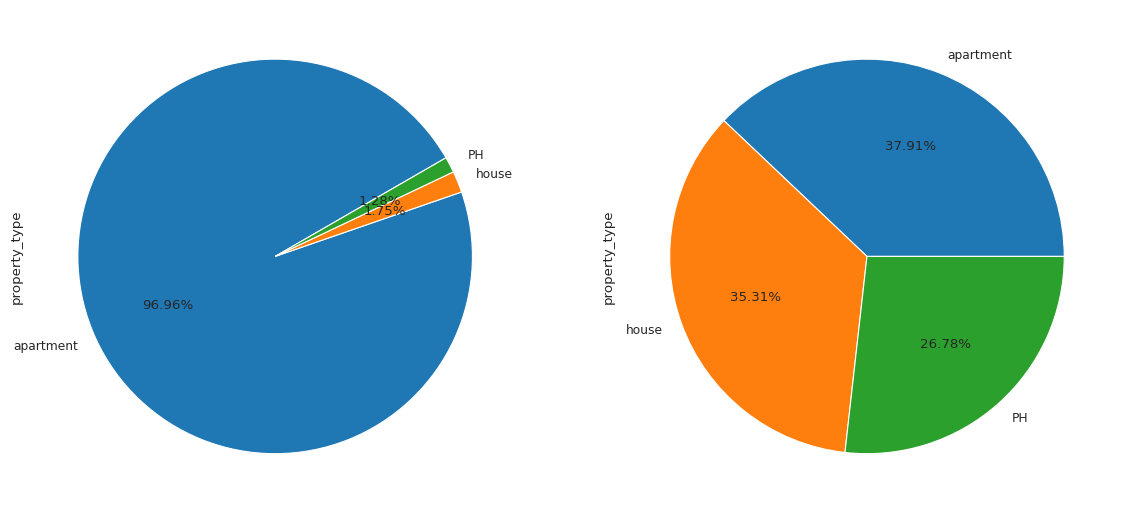

In [75]:
barrios_houses_ph = perc_houses_ph.sort_values()[::-1][:5].index
barrios_apartments = perc_apartments.sort_values()[::-1][:5].index

fig, axs = plt.subplots(1,2,figsize=(14,7))
df[df.barrio.isin(barrios_apartments)].property_type.value_counts().plot(x=None,y=None, kind='pie', startangle=30, ax=axs[0],autopct='%1.2f%%')
df[df.barrio.isin(barrios_houses_ph)].property_type.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
plt.show()

#### Cheapest and Most Expensive barrios

The `price_usd_per_m2` will give us an idea on this topic, start out by checking the statistics of this feature.

In [78]:
df[['price_usd_per_m2']].describe()

,price_usd_per_m2
count,15207.0
mean,2748.9
std,1863.8
min,1.0
25%,2000.0
50%,2555.6
75%,3160.9
max,142450.1


According to the **Price related variables** section this feature has a significant presence of outliers, that is, either houses, apartments or PHs with a high `price_per_m2` due to hidden variables as luxury, furnished properties, etc. The outliers will be processed in **Feature Engineering** section.  

For now, let's continue with the cheaper and more expensive properties in dataset.

#### Más baratos

In [82]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
cheaper = table.sort_values('price_usd_per_m2', ascending=True).iloc[:5]
cheaper

,price_usd_per_m2
barrio,
VILLA SOLDATI,920.8
VILLA LUGANO,1182.1
VILLA RIACHUELO,1280.1
PARQUE AVELLANEDA,1376.5
MATADEROS,1554.6


#### Más caros

In [83]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
expensive = table.sort_values('price_usd_per_m2', ascending=False).iloc[:5]
expensive

,price_usd_per_m2
barrio,
PUERTO MADERO,6155.5
PALERMO,3608.5
BELGRANO,3322.2
RECOLETA,3313.1
RETIRO,3261.5


### Quitando valores extremos
Eliminemos aquellas observaciones cuyo precio por metro cuadrado este fuera de los percentiles 10 y 90. De este modo intentaremos remover valores extremos de una manera sencilla para tener un análisis más robusto.

In [ ]:
p10 = np.percentile(df_filtered.price_usd_per_m2, 10)
p90 = np.percentile(df_filtered.price_usd_per_m2, 90)
df_filtered = df_filtered[(df_filtered.price_usd_per_m2 >= p10) & (df_filtered.price_usd_per_m2 <= p90)]

A partir de quitar estos valores van a cambiar los estadísticos que calculamos.

**12) Volvé a calcular** los mismos estadísticos (min, max, promedio, etc) para ver los cambios.
¿Por qué será que la **mediana** no cambia?

In [ ]:
st_2 = stats_calc(df_filtered.price_usd_per_m2)
print(st_2)

median_change = round(abs(st_2.get("median") -st_1.get("median"))/ st_1.get("median") *100, 1)
mean_change = round(abs(st_2.get("mean") -st_1.get("mean"))/ st_1.get("mean") *100, 1)

print("\nLa mediana cambió un", median_change, "%. Ya que esta no es tan sensible a outliers comparada con la media.")
print("La media cambió un", mean_change,"%.")

Vamos a graficar ahora los barrios según el precio por metro cuadrado.

In [ ]:
plt.xticks(rotation = 90)
barrios = df_filtered.groupby('barrio').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="barrio", y="price_usd_per_m2", order=barrios, data=df_filtered);

## Graficando propiedades de los barrios

Ahora que ya sabemos cuales son los barrios más caros y cuales son los más baratos vamos a ver algunas comparaciones gráficas para entender mejor sus diferencias en diferentes atributos del dataset. Vamos a ver las distribuciones según:
- Superficie total en m2
- Cuartos totales 
- Precio en dolares por m2

In [ ]:
barrios_caros = mas_caros.index 
barrios_baratos = mas_baratos.index

In [ ]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].surface_total_in_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].surface_total_in_m2, label="Barrios caros")
g.set_xlim(0, 400)
plt.legend()

In [ ]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].rooms, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].rooms, label="Barrios caros")
g.set_xlim(0, 10)
plt.legend()

In [ ]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].price_usd_per_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].price_usd_per_m2, label="Barrios caros")
plt.legend()

### Barrios que quieren ser otros

Basado en información de mercado, desde el portal Properati han señalado que las inmobiliarias suelen publicar las propiedades ubicadas en barrios que no necesariamente se corresponden con la ubicación geográfica real. Según mencionan en la nota ([blog)](http://blog.properati.com.ar/barrios-que-quieren-ser-otros/), esto corresponde a una lógica comercial en el corredor norte y a usos y costumbres en zona oeste.

Analicemos qué sucede para nuestro dataset.

Dada la estructura del atributo `place_with_parent_names`, en primer lugar vamos a extraer el campo asociado al barrio publicado para poder comparar con el que surge de la cartografía oficial. Esto lo vamos a agregar en una nueva columna llamada `barrio_publicado`. 

De este modo, lo que vamos a analizar es como se relacionan las columnas `barrio` y `barrio publicado`. Si efectivamente hay barrios que quieren ser otros, esperaríamos ver propiedades ubicadas en geográficamente en un barrio distinto al que dice la publicación. Por ejemplo, si una propiedad está ubicada (dadas sus coordenadas) en Villa Crespo pero en la publicación dice Palermo, entonces decimos que hay indicios que Villa Crespo quiere ser Palermo.

Viendo la estructura de este atributo, podemos notar que se compone por una sequencia de lugares separados por `|`. Por ejemplo, en `|Argentina|Capital Federal|Palermo|` vemos que primero está el país, luego la ciudad, luego el barrio y en algunos casos hay una jerarquía más, relacionado con zonas dentro del barrio (como Palermo Soho dentro de Palermo). 

De este modo, una estrategia posible para resolver esto es separar las jerarquías por `|` y extraer el elemento asociado al barrio. Por ejemplo, para `|Argentina|Capital Federal|Palermo|` queda `['', 'Argentina', 'Capital Federal', 'Palermo', '']`. Extrayendo el tercer elemento obtendremos el barrio independientemente de si hay lugares luego en la jerarquía. Aquellos que no tengan barrio no serán considerados puesto que estarían ubicados en Capital Federal y no sería informativo.

Lo pasamos a mayúsculas y quitamos las tildes para poder comparar con el barrio oficial.

In [ ]:
df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))).unique()

Como algunos tienen 4 elementos, debemos quitarlos.

In [ ]:
split_place_filter = df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))!=4)
df_filtered = df_filtered.loc[split_place_filter]

In [ ]:
df_filtered['barrio_publicado'] = df_filtered['place_with_parent_names'].apply( lambda x: x.split("|")[3].upper())
df_filtered['barrio_publicado'] = df_filtered['barrio_publicado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

Comparemos entonces el barrio publicado con el real. Nos vamos a quedar con aquellas propiedades donde nos coincidan para luego hacer el conteo por barrio.

In [ ]:
barrios_match = (df_filtered['barrio_publicado'] != df_filtered['barrio'])
df_filtered_barrio_not_match = df_filtered.loc[barrios_match]

Con una tabla de doble entrada podemos identificar para cada barrio cuál es al que más quiere parecerse.

In [ ]:
table = pd.crosstab(df_filtered_barrio_not_match.barrio, df_filtered_barrio_not_match.barrio_publicado)
table.idxmax(axis=1)

Podemos ver entonces que los barrios tienden a querer parecerse a barrios con precio con metro cuadrado más caro. Por ejemplo Villa Crespo con Palermo, Constitución con San Telmo y Villa Urquiza con Belgrano. 

Por otro lado, vemos también que los barrios suelen querer parecerse a sus barrios vecinos.

# Data Cleaning

In [ ]:
to_drop = ['surface_total_in_m2','surface_covered_in_m2','rooms','price_aprox_usd','price_usd_per_m2']
df.dropna(subset = to_drop, axis = 0, inplace = True)

In [ ]:
# drop values
# Imput surface total
# 

# Feature Engineering

In [2]:
path_dataset = 'dataset/datos_properati_limpios.csv'
df = pd.read_csv(path_dataset, parse_dates=['created_on'])
df.head()

,created_on,property_type,place_name,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio
0,2017-09-22,house,Palermo Viejo,|Argentina|Capital Federal|Palermo|Palermo Viejo|,-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO
1,2017-08-29,apartment,Palermo,|Argentina|Capital Federal|Palermo|,-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_depar...,PALERMO
2,2017-08-29,apartment,Palermo,|Argentina|Capital Federal|Palermo|,-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_depar...,PALERMO
3,2017-08-29,apartment,Palermo,|Argentina|Capital Federal|Palermo|,-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_depar...,PALERMO
4,2017-08-30,house,Palermo Hollywood,|Argentina|Capital Federal|Palermo|Palermo Hol...,-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_...,PALERMO


In [3]:
df.columns

Index(['created_on', 'property_type', 'place_name', 'place_with_parent_names',
       'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
       'expenses', 'properati_url', 'barrio'],
      dtype='object')

In [4]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 13756 observaciones


Dado que ya lo trabajamos en el proyecto anterior, en este caso ya hemos filtrado observaciones para trabajar solo con casas (house), departamentos (apartment) y PH (PH).

### Outliers

Analicemos en primer lugar los valores extremos que puede haber en los precios y en las superficies. Esto nos va a ser útil para luego imputar usando medidas de tendencia central, como el promedio. 
Recordemos que las medidas de tendencia central pueden ser sensibles a outliers, por lo que la imputación de valores faltantes puede verse afectada

Una posible pregunta que surge es si conviene primero imputar faltantes y luego remover outliers, o lo contrario.  Cuando se imputa se modifica la distribución de los datos. Por eso, las cotas que utilicemos para definir los outliers se verán afectadas por este cambio y modificarán los resultados finales. Entonces comenzaremos quitando outliers.

Vamos a trabajar con `price_usd_per_m2`. Precios altos pueden corresponderse con grandes superficies, por lo que conviene analizar juntos ambos atributos. Veamos la distribución de los valores y un boxplot para comenzar a identificar los outliers.

**1) Utilizá** seaborn para hacer un `distplot` del precio por metro cuadrado. 

Deberás hacer un `drop` de los valores `NaN` de esta columna antes de graficar.

Text(0.5, 1.0, 'Price USD/m2 Distibution')

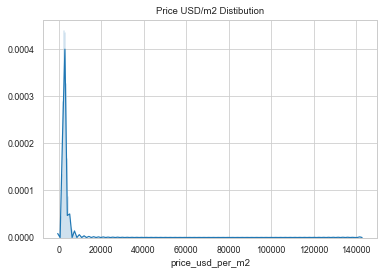

In [5]:
df.dropna(subset=["price_usd_per_m2"],axis=0,inplace = True)
sns.distplot(df["price_usd_per_m2"], bins = 300)
plt.title("Price USD/m2 Distibution")

**2) Hacé** un `boxplot` de la columna `price_usd_per_m2`

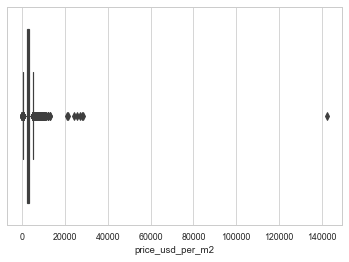

In [6]:
sns.boxplot(x="price_usd_per_m2",data=df)

¿A qué conclusión podemos llegar observando estas figuras?
**Responder**

Se encuentran datos atípicos, *outliers*, los cuales inciden en el valor de la media. Aquellos que se ven a la derecha del diagrama de cajas. En este caso corresponden a un valor muy alto del metro cuadrado en una propiedad.

Para confirmar la presencia de outliers vamos a utilizar los percentiles.

**3) Describir** la columna mostrando sus estadísticos

In [7]:
round(df[["price_usd_per_m2"]].describe(),2)

,price_usd_per_m2
count,12973.00
mean,2695.07
std,1773.09
min,0.96
25%,1959.18
50%,2510.20
75%,3125.00
max,142450.14


Estamos ante la presencia de valores extremos en ambas puntas de la distribución. Vamos a aplicar la técnica del rango intercuartílico para limpiarlos.

Para obtener el rango tenemos que calcular la diferencia entre el tercer y el primer percentil. Luego en base a esto calcularemos los valores mínimos y máximos para definir qué observaciones serán descartadas.

**4) Aplicar la técnica del rango intercuartílico** para limpiar el precio por metro cuadrado. El resultado deberá ser un `dataframe` llamado `df_filtered` sin los outliers.

In [8]:
q1 = df.price_usd_per_m2.quantile(0.25)
q3 = df.price_usd_per_m2.quantile(0.75)

bottom = q1 - 1.5*(q3-q1)
top = q3 + 1.5*(q3-q1)

df_filtered = df[(df.price_usd_per_m2 >= bottom) & (df.price_usd_per_m2 <= top)]

**5)** Volver a **plotear** con `distplot` y `boxplot` los precios sin los outliers y observá las diferencias con los anteriores ploteo.

Text(0.5, 1.0, 'Price USD/m2 Distribution')

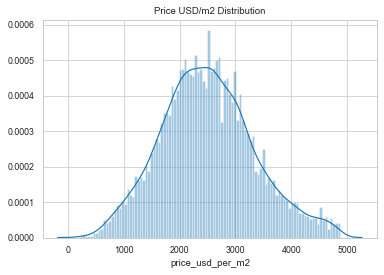

In [9]:
sns.distplot(df_filtered["price_usd_per_m2"], bins = 100, kde = True)
plt.title("Price USD/m2 Distribution")

Text(0.5, 1.0, 'Price USD/m2 BoxPlot')

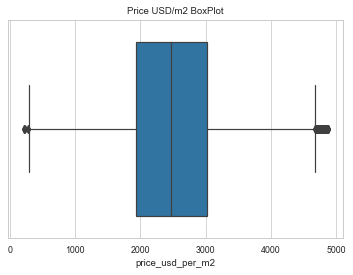

In [10]:
sns.boxplot(x="price_usd_per_m2", data = df_filtered)
plt.title("Price USD/m2 BoxPlot")

**6) Describir** nuevamente la columna mostrando sus estadísticos.

In [11]:
round(df_filtered[["price_usd_per_m2"]].describe(),2)

,price_usd_per_m2
count,12288.00
mean,2505.09
std,834.95
min,213.07
25%,1933.33
50%,2466.67
75%,3027.86
max,4871.79


Vamos a seguir trabajando con el `dataframe` filtrado

In [12]:
df = df_filtered

### Valores Faltantes

A diferencia del proyecto pasado, vamos a intentar imputar los valores faltantes para los atributos que consideramos importantes para el mercado inmobiliario. 

Estos atributos son los que informan **superficie (total o cubierta), cantidad de ambientes, precio y precio por metro cuadrado**. 

Veamos en primer lugar cuántos valores faltantes tiene cada atributo. Nos interesa verlo como un porcentaje en relación a la cantidad de observaciones. Si un atributo tiene un elevado porcentaje de faltantes, puede ser mejor no considerarlo en el análisis.

**7) Mostrar** cual es el porcentaje de valores faltantes para cada columna.

In [13]:
round(df.isna().sum()[df.isna().sum()>0].rename_axis("Feature", axis = 0).to_frame("% missing values").sort_values(by = "% missing values", ascending = False)/len(df)*100,1)

,% missing values
Feature,
floor,85.1
expenses,74.0
rooms,17.6
surface_covered_in_m2,3.9


Podemos ver en los resultados que los atributos `floor` y `expenses` tienen un elevado porcentaje de faltantes.  Una opción sería descartar estas columnas en el análisis. 
Si elimináramos las observaciones (filas) asociadas a estos, perderíamos el 84.79% de los datos, mermando demasiado el conjunto de datos.

Otra opción sería por ejemplo considerar categorías como faltantes o no faltantes o en todo caso analizar si hay algún patrón para poder evitar quitarlos. 

Para avanzar con el proyecto, vamos a quitar esos atributos.

In [14]:
df = df.drop(['floor', 'expenses'], axis = 1)

Analicemos estrategias para imputar los valores faltantes para los atributos `rooms`, `surface_total_in_m2` y `surface_covered_in_m2`.

Como vimos en las actividades, entre las opciones que tenemos está la posibilidad de imputar por algún medida de tendencia central, como el caso de la media o la mediana. Vamos a avanzar en esa dirección.

**8) Imputar las observaciones faltantes** de la columna `surface_total_in_m2 ` y `surface_covered_in_m2` usando la **media**. 

`Scikit-learn` nos provee la clase `Imputer` que implementa las formas más comunes de imputación.

In [15]:
#Crea un dataframe sin valores nulos, antes de imputar, luego se usará para comparar
df_nonulls = df.dropna(subset=["surface_total_in_m2","surface_covered_in_m2","rooms"] , axis = 0, 
                       inplace = False)[["surface_total_in_m2","surface_covered_in_m2","rooms"]]

imp = SimpleImputer(missing_values = np.NaN, strategy='mean')

df[["surface_total_in_m2", "surface_covered_in_m2"]] = imp.fit_transform(X=df[["surface_total_in_m2", 
                                                                               "surface_covered_in_m2"]])

Una de las limitaciones que presenta este tipo de imputación es que provoca estimaciones sesgadas de la varianza. Esto impacta en los errores estandar y, por ende, en los tests estadístcos.

Este tipo de técnicas es útil cuando los valores son completamente al azar.

**9) Imputar las observaciones faltantes** de la columna `rooms` usando la **mediana**.

In [16]:
imp = SimpleImputer(missing_values = np.NaN, strategy='median')
df["rooms"] = imp.fit_transform(X=df[["rooms"]])

Comparemos los estadísticos antes y después de imputar

In [17]:
print("Before imputing values.")
round(df_nonulls.describe(),2)

Before imputing values.


,surface_total_in_m2,surface_covered_in_m2,rooms
count,9827.00,9827.00,9827.00
mean,109.29,91.81,3.10
std,154.98,76.18,1.59
min,16.00,2.00,1.00
25%,50.00,44.00,2.00
50%,76.00,68.00,3.00
75%,130.00,110.00,4.00
max,9874.00,975.00,17.00


In [18]:
print("After imputing values.")
round(df[["surface_total_in_m2","surface_covered_in_m2", "rooms"]].describe(),2)

After imputing values.


,surface_total_in_m2,surface_covered_in_m2,rooms
count,12288.00,12288.00,12288.00
mean,111.71,93.82,3.07
std,154.62,86.31,1.44
min,14.00,1.00,1.00
25%,49.00,45.00,2.00
50%,75.00,70.00,3.00
75%,130.00,108.00,4.00
max,9874.00,2500.00,17.00


Comparemos gráficamente la distribución de los datos en un rango en el cual se pueda apreciar la mayoría de los datos

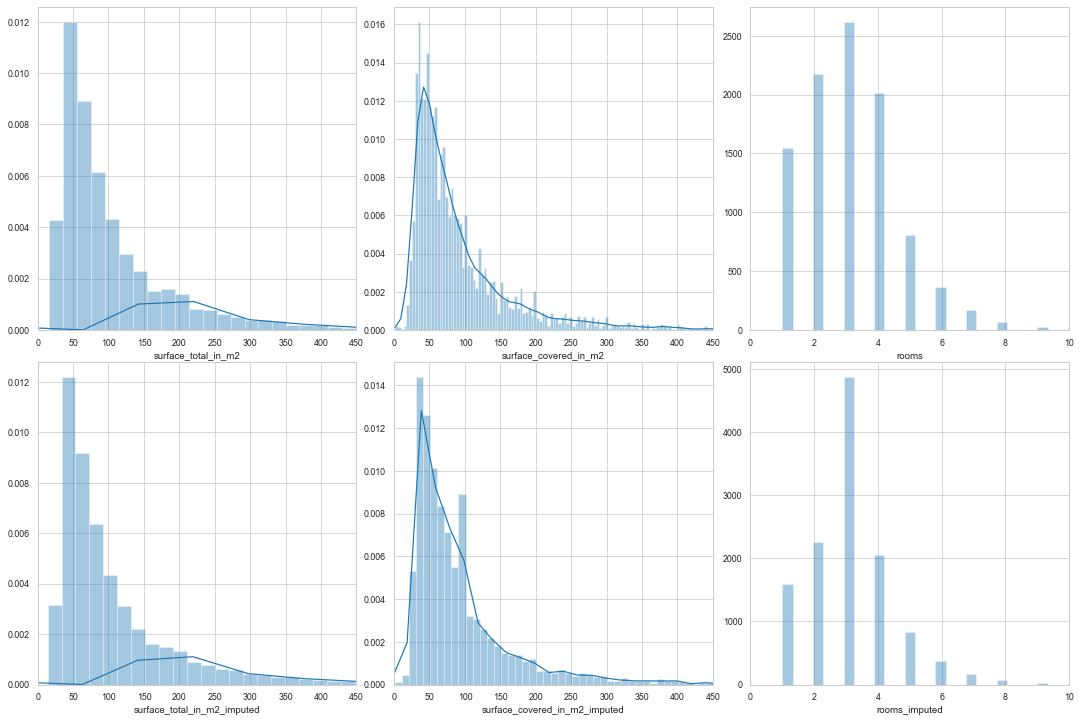

In [19]:
fig,axes =  plt.subplots(2,3, figsize=(15,10))
plt.tight_layout()

sns.distplot(df_nonulls["surface_total_in_m2"],bins = 500,ax=axes[0][0]).set(xlim=(0,450))
sns.distplot(df_nonulls["surface_covered_in_m2"],bins = 250,ax=axes[0][1]).set(xlim=(0,450))
sns.distplot(df_nonulls["rooms"],bins = 50, kde = False,ax=axes[0][2]).set(xlim=(0,10))

sns.distplot(df["surface_total_in_m2"],bins = 500,ax=axes[1][0], axlabel= "surface_total_in_m2_imputed").set(xlim=(0,450))
sns.distplot(df["surface_covered_in_m2"],bins = 250,ax=axes[1][1], axlabel= "surface_covered_in_m2_imputed").set(xlim=(0,450))
sns.distplot(df["rooms"],bins = 50, kde = False,ax=axes[1][2], axlabel= "rooms_imputed").set(xlim=(0,10))

plt.show()

#### Observaciones:
* **surface_total_in_m<sup>2</sup>:** No se apreció significativa variación en sus estadísticos ni gráficamente.
* **surface_covered_in_m<sup>2</sup>:** Se apreció la aparición de un pico cercano a ~[90-100m<sup>2</sup>] producto de la imputación de datos con el valor correspondiente al valor de la media antes de imputar. Además de un incremento de la dispersión de los datos por la inclusión de más datos alejados de la media, nótese el cambio en el valor máximo.
* **rooms:** Se apreció un aumento significativo en la ocurrencia: 3 habitaciones, valor correspondiente a la mediana antes de la imputación.

### Variables binarias

#### Generar variables binarias para el atributo `property_type`.

Hay que tener en cuenta en este caso que el atributo es categórico.

Para hacerlo usando scikit-learn, por como vienen dados los valores (en formato string), primero conviene convertirlos en numéricos. Para esto usamos `LabelEncoder`.

**10) Convertí** las variables de `property_type` utilizando `LabelEncoder`

In [20]:
le = LabelEncoder()
properties_encoded = le.fit_transform(df["property_type"])

**11) Mostrar** las clases del `LabelEncoder`:

In [21]:
list(le.classes_)

['PH', 'apartment', 'house']

Luego con `OneHotEncoder` obtenemos las categorías expresadas como **variables binarias**. 

**12) Aplicar** `OneHotEncoder` sobre las variables categóricas para crear un dataframe `categoricals_df`

In [22]:
onehot_encoder = OneHotEncoder(sparse=False, categories= "auto")
properties_encoded = properties_encoded.reshape(len(properties_encoded),1)

categoricals_df = pd.DataFrame(onehot_encoder.fit_transform(properties_encoded),columns=(list(le.classes_)))
categoricals_df.head()

,PH,apartment,house
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


Unimos el nuevo dataframe `categorical_df` con el `dataframe` original `df`. Para esto, necesitamos que tengan el mismo índice.

In [23]:
categoricals_df = categoricals_df.set_index(df.index)
df = pd.concat([df, categoricals_df], axis=1)
df.head()

,created_on,property_type,place_name,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,barrio,PH,apartment,house
1,2017-08-29,apartment,Palermo,|Argentina|Capital Federal|Palermo|,-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,4.0,https://www.properati.com.ar/1dzv6_venta_depar...,PALERMO,0.0,1.0,0.0
2,2017-08-29,apartment,Palermo,|Argentina|Capital Federal|Palermo|,-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,1.0,https://www.properati.com.ar/1e05k_venta_depar...,PALERMO,0.0,1.0,0.0
3,2017-08-29,apartment,Palermo,|Argentina|Capital Federal|Palermo|,-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,3.0,https://www.properati.com.ar/1e0mq_venta_depar...,PALERMO,0.0,1.0,0.0
4,2017-08-30,house,Palermo Hollywood,|Argentina|Capital Federal|Palermo|Palermo Hol...,-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,6.0,https://www.properati.com.ar/1e1ve_venta_casa_...,PALERMO,0.0,0.0,1.0
5,2017-08-30,house,Palermo,|Argentina|Capital Federal|Palermo|,-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,6.0,https://www.properati.com.ar/1e1vf_venta_casa_...,PALERMO,0.0,0.0,1.0


### Variables calculadas

__Calcular el precio por metro cuadrado (precio/superficie total). Llamar a este atributo `price_m2`.__

Hay que tener cuidado en esta parte respecto de dividir por cero. Para ello, armemos una función de división que contemple eso.

El hecho de crear una columna nueva y no imputar los faltantes es simplemente una decisión. Cuando veamos modelos predictivos, vamos a poder cuantificar el costo de las decisiones que tomemos en términos de performance del modelo.

In [24]:
def custom_division(x, y):
    if y > 0:
        res = x / y
    else:
        res = 0
    return res

df['price_m2'] = df.apply(lambda x: custom_division(x['price_aprox_usd'], x['surface_total_in_m2']), axis = 1)
df.drop(['price_usd_per_m2'], axis=1, inplace=True)

__Verificar que ya no quedan atributos con valores faltantes__

In [25]:
# Creamos un dataset con los porcentajes de nulos
df_faltantes = pd.DataFrame(df.isnull().sum() / df.shape[0], columns=['Porcentaje nulos'])
# Solo mostramos los que tengan valores nulos. Si el porcentaje es 0 no se muestra
round(df_faltantes.loc[~(df_faltantes==0).all(axis=1)]*100,1)

,Porcentaje nulos


In [26]:
print("El dataset final luego del procesamiento tiene {} observaciones".format(df.shape[0]))

El dataset final luego del procesamiento tiene 12288 observaciones



De este modo, hemos limpiado valores extremos e imputado valores nulos. El costo de esto fue la pérdida de 685 observaciones, 5% de la cantidad original de filas.

# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline


pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

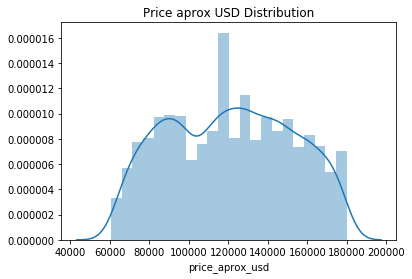

In [3]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

#Separamos el dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Apreciemos gráficamente cómo se encuentra distribuida el feature: price_aprox_usd
sns.distplot(y)
plt.title("Price aprox USD Distribution")
plt.show()

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [4]:
tree_r = DecisionTreeRegressor(random_state=42)
model = tree_r.fit(X_train,y_train)

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [5]:
y_pred = tree_r.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [6]:
rmse_tree = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
print("Los valores estimados cuentan con una difencia promedio de USD{} respecto a los valores test reales.".format(rmse_tree))

Los valores estimados cuentan con una difencia promedio de USD26091.27 respecto a los valores test reales.


## __Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [7]:
max_depth_o = tree_r.get_depth()
print("La profundidad máxima del árbol corresponde a {}.".format(max_depth_o))
rmses_train = []
rmses_test = []

for i in range(5,max_depth_o+1,5):
    clf = DecisionTreeRegressor(max_depth=i)
    model = clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_train)
    y_pred.reshape(y_pred.shape[0],1)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, y_pred)))
    
    y_pred = clf.predict(X_test)
    y_pred.reshape(y_pred.shape[0],1)
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))

#Calculamos el procentaje de error
rmses_train_perc = rmses_train/np.mean(rmses_train)*100
rmses_test_perc = rmses_test/np.mean(rmses_test)*100

La profundidad máxima del árbol corresponde a 30.


Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

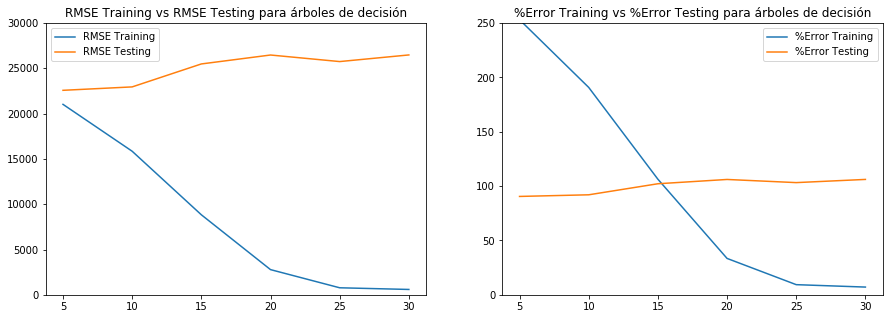

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.setp(ax, xticks = range(5,max_depth_o+1, 5))

ax[0].plot(range(5,max_depth_o+1, 5), rmses_train, label='RMSE Training')
ax[0].plot(range(5,max_depth_o+1, 5), rmses_test, label='RMSE Testing')
ax[0].legend(loc="best")
ax[0].set_ylim((0, 30000))
ax[0].set_title("RMSE Training vs RMSE Testing para árboles de decisión")

ax[1].plot(range(5,max_depth_o+1, 5), rmses_train_perc, label='%Error Training')
ax[1].plot(range(5,max_depth_o+1, 5), rmses_test_perc, label='%Error Testing')
ax[1].set_ylim((0, 2.5*100))
ax[1].set_title("%Error Training vs %Error Testing para árboles de decisión")
ax[1].legend(loc="best")

plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [9]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
rmse_knn = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
print("Los valores estimados cuentan con una difencia promedio de USD{} respecto a los valores test reales.".format(rmse_knn))

Los valores estimados cuentan con una difencia promedio de USD24219.93 respecto a los valores test reales.


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [10]:
rmses_train = []
rmses_test = []


for i in range(1,30,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_train)
    y_pred.reshape(y_pred.shape[0],1)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, y_pred)))
    
    y_pred = knn.predict(X_test)
    y_pred.reshape(y_pred.shape[0],1)
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))

#Calculamos el procentaje de error
rmses_train_perc = rmses_train/np.mean(rmses_train)*100
rmses_test_perc = rmses_test/np.mean(rmses_test)*100

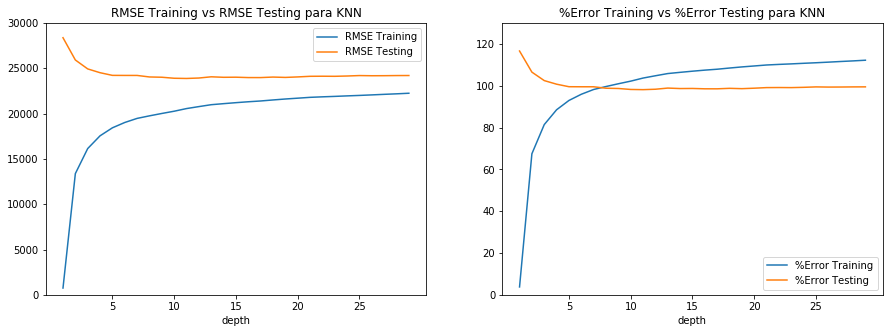

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.setp(ax,xticks=range(5,30, 5))

ax[0].plot(range(1,30, 1), rmses_train, label='RMSE Training')
ax[0].plot(range(1,30, 1), rmses_test, label='RMSE Testing')
ax[0].legend(loc="best")
ax[0].set_ylim((0, 30000))
ax[0].set_title("RMSE Training vs RMSE Testing para KNN")
ax[0].set_xlabel("depth")


ax[1].plot(range(1,30, 1), rmses_train_perc, label='%Error Training')
ax[1].plot(range(1,30, 1), rmses_test_perc, label='%Error Testing')
ax[1].set_ylim((0, 1.3*100))
ax[1].set_title("%Error Training vs %Error Testing para KNN")
ax[1].legend(loc="best")
ax[1].set_xlabel("depth")

plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [12]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [13]:
max_depth=5
regressor = DecisionTreeRegressor(max_depth=max_depth)

neg_scores = cross_val_score(regressor, X_train, y_train, scoring = 'neg_mean_squared_error',cv=10)
rmse_mean = round(nmsq2rmse(neg_scores).mean(),2)
print("El promedio del error cuadrático medio corresponde a USD{} para un árbol con una profundidad máxima de {}.".format(
    rmse_mean,max_depth))

El promedio del error cuadrático medio corresponde a USD21594.7 para un árbol con una profundidad máxima de 5.


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [14]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [15]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename(
    'Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [16]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,82000.000,68414.286,13585.714
1,110000.000,115213.125,5213.125
2,80000.000,83877.700,3877.700
3,148000.000,115213.125,32786.875
4,110000.000,130965.454,20965.454
5,145000.000,130965.454,14034.546
6,165000.000,150905.888,14094.112
7,175000.000,150905.888,24094.112
8,169900.000,130965.454,38934.546
9,138000.000,119260.627,18739.373


# MiniProyecto 4: Optimización de parámetros

¡Bienvenidos al cuarto (mini)proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando (por última vez) con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso es optimizar los parámetros de los algoritmos que usamos en el proyecto pasado.

El dataset es el mismo del proyecto 3. Recordemos que las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadréatico medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

## Pandas - Levantamos el dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
np.random.seed(123)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)
df.head()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
0,-34.589,-58.417,170000.000,40.000,38.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-34.591,-58.418,90000.000,27.000,27.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-34.587,-58.437,150000.000,44.000,44.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-34.593,-58.428,154000.000,58.000,58.000,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-34.593,-58.428,154000.000,58.000,58.000,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**Separá** el dataset en entrenamiento (80%) y test (20%) utilizando como target la columna `price_aprox_usd`

In [2]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(f"El dataset de entrenamiento se compone de {X_train.shape[0]} observaciones.\nEl dataset de testeo se compone de {X_test.shape[0]}.")

El dataset de entrenamiento se compone de 5100 observaciones.
El dataset de testeo se compone de 1276.


## Scikit-learn - Entrenamiento

Para repasar los parámetros de árboles de decisión en Scikit-learn: 

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

En primer lugar veamos como hacer cross validation. Para eso necesitamos definir la cantidad de folds, en este caso vamos a usar 5.

GridSearchCV nos permite testear a través de un espacio de búsqueda de parámetros la mejor combinación posible dado un estimador.

Por ejemplo, en este caso probamos la profundidad máxima y la máxima cantidad de features para hacer los split. Ambos entre 1 y 5.
Recordemos que para hacer la optimización scikit-learn usa la métrica `neg_mean_squared_error` en lugar de `mean_squared_error`.

**Creá** una variable `param_grid` con valores del 1 al 5 para los atributos `max_depth` y `max_features`. 

In [3]:
param_grid = [{'max_depth':[1,2,3,4,5],'max_features':[1,2,3,4,5]}]
param_grid

[{'max_depth': [1, 2, 3, 4, 5], 'max_features': [1, 2, 3, 4, 5]}]

**Creá** una variable `grid_search` y asignale un `GridSearchCV` que recorra el `param_grid` que creaste con el algoritmos `DecisionTreeRegressor` y el un scoring de `neg_mean_squared_error`

In [4]:
tree_reg = DecisionTreeRegressor(random_state = 0)
grid_search = GridSearchCV(estimator=tree_reg, param_grid = param_grid, cv = 5, 
                           scoring = 'neg_mean_squared_error', return_train_score=True)

A continuación, realizá el `fit` del `grid_search` con el conjunto de entrenamiento

In [5]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5],
                          'max_features': [1, 2, 3, 4, 5]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='n

Revisemos los resultados. Recordemos que no están expresados en RMSE.

**Mostrá** los `grid_scores` obtenidos durante el `grid_search`

In [6]:
grid_scores = pd.DataFrame(grid_search.cv_results_['params'])
grid_scores['neg_mean_train_score'] = grid_search.cv_results_['mean_train_score']
grid_scores['neg_mean_test_score'] = grid_search.cv_results_['mean_test_score']
grid_scores.head()

,max_depth,max_features,neg_mean_train_score,neg_mean_test_score
0,1,1,-979014205.942,-979790172.137
1,1,2,-978511586.894,-979795655.597
2,1,3,-967114860.993,-967431345.965
3,1,4,-967114860.993,-967431345.965
4,1,5,-967114860.993,-967431345.965


De esta manera, el valor con mejor resultado (dado el espacio de búsqueda definido) es `max_depth` 3 y `max_features` 3.

**Mostrá** el mejor score y los mejores parámetros encontrados por `grid_search`

In [7]:
print(f"Mejor score: {round(grid_search.best_score_,2)}")

depth = grid_search.best_params_['max_depth']
features = grid_search.best_params_['max_features']
print(f"Los mejores parámetros:\n  depth: {depth}\n  features: {features}\n ")

Mejor score: -729969370.34
Los mejores parámetros:
  depth: 3
  features: 3
 


Convertimos a RMSE.

In [8]:
def nmsq2rmse(score):
    return np.round(np.sqrt(-score), 2)

grid_scores['root_mean_train_score'] = grid_scores['neg_mean_train_score'].apply(lambda x: nmsq2rmse(x))
grid_scores['root_mean_test_score'] = grid_scores['neg_mean_test_score'].apply(lambda x: nmsq2rmse(x))
grid_scores.drop(['neg_mean_train_score', 'neg_mean_test_score'],axis=1,inplace =True)
grid_scores.head()

,max_depth,max_features,root_mean_train_score,root_mean_test_score
0,1,1,31289.200,31301.600
1,1,2,31281.170,31301.690
2,1,3,31098.470,31103.560
3,1,4,31098.470,31103.560
4,1,5,31098.470,31103.560


Validemos gráficamente que el mínimo se encuentra en `max_depth` 3 y `max_features` 3.

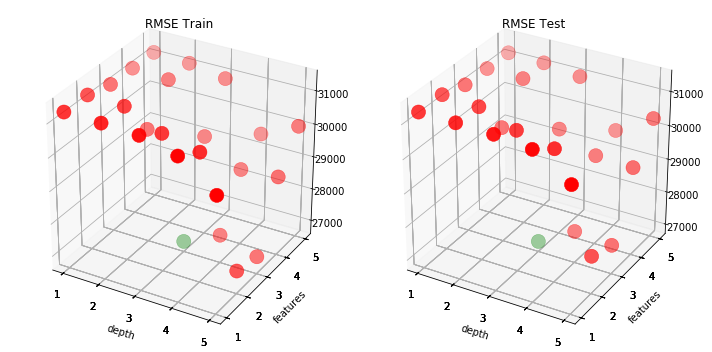

In [9]:
x = np.array(grid_scores['max_depth'])
y = np.array(grid_scores['max_features'])
z1 = grid_scores['root_mean_train_score']
z2 = grid_scores['root_mean_test_score']


# Se crea una máscara para diferenciar el mínimo con el color verde
zmin1 = np.min(z1)
mask1 = np.array(z1) == zmin1
color1 = np.where(mask1, 'green', 'red')
zmin2 = np.min(z2)
mask2 = np.array(z2) == zmin2
color2 = np.where(mask2, 'green', 'red')


# Inicializamos dos gráficos 3D
fig = plt.figure(figsize=(10,5))


ax1 = fig.add_subplot(1, 2, 1,projection='3d',xticks=x,yticks=y,title="RMSE Train",xlabel="depth", ylabel="features")
ax1.scatter(x, y, z1, c=color1, cmap='viridis', linewidth=0.5, s=200)

ax = fig.add_subplot(1, 2, 2,projection='3d',sharex=ax1,sharey=ax1,title="RMSE Test",xlabel="depth",ylabel="features")
ax.scatter(x, y, z2, c=color2, cmap='viridis', linewidth=0.5, s=200)

plt.tight_layout()
plt.show()

Se aprecia entonces que el mínimo del error de entrenamiento y validación se encuentra en `max_depth` 3 y `max_features` 3.

Recordemos que `GridSearchCV` tiene como parámetro default `refit=True`. Esto significa que luego de hacer la corrida se ajusta el mejor modelo al conjunto de datos de entrada. De esta manera, se puede predecir directamente usando `best_estimator_`.

In [10]:
optimised_decision_tree = grid_search.best_estimator_

__Evaluemos en testing el desempeño de este modelo.__

Como venimos trabajando, el resultado en testing será la medición que usaremos como benchmark para comparar este modelos con otros en el futuro, puesto que no estuvo en contacto con el dataset de test para la calibración.

In [11]:
y_opt_pred = optimised_decision_tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_opt_pred))
np.round(rmse)

25820.0

Vemos los primeros 10 resultados de la predicción del valor de propiedades.

In [12]:
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_opt_pred)

In [13]:
predicciones1 = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [14]:
predicciones1.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,80000.000,98157.836,18157.836
1,128000.000,131079.617,3079.617
2,150000.000,131079.617,18920.383
3,85000.000,131079.617,46079.617
4,135000.000,133881.445,1118.555
5,135000.000,98157.836,36842.164
6,68000.000,131079.617,63079.617
7,110000.000,131079.617,21079.617
8,134000.000,131079.617,2920.383
9,110000.000,98157.836,11842.164


__Encontrar el mejor modelo para el espacio de búsqueda dado__

* `"min_samples_split": [2, 10, 20]`
* `"max_depth": [None, 2, 5, 10, 15]`
* `"min_samples_leaf": [1, 5, 10, 15]`
* `"max_leaf_nodes": [None, 5, 10, 20]`

In [15]:
param_grid = [{"min_samples_split": [2, 10, 20],
               "max_depth": [None, 2, 5, 10, 15],
               "min_samples_leaf": [1, 5, 10, 15],
               "max_leaf_nodes": [None, 5, 10, 20]}]

tree_reg = DecisionTreeRegressor(random_state = 0)
grid_search = GridSearchCV(estimator=tree_reg, param_grid = param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [None, 2, 5, 10, 15],
                          'max_leaf_nodes': [None, 5, 10, 20],
                          'min_samples_leaf': [1, 5, 10, 15],
                          'mi

In [16]:
grid_scores = pd.DataFrame(grid_search.cv_results_['params']).replace(np.NaN,0)
grid_scores['neg_mean_train_score'] = grid_search.cv_results_['mean_train_score']
grid_scores['neg_mean_test_score'] = grid_search.cv_results_['mean_test_score']

grid_scores['root_mean_train_score'] = grid_scores['neg_mean_train_score'].apply(lambda x: nmsq2rmse(x))
grid_scores['root_mean_test_score'] = grid_scores['neg_mean_test_score'].apply(lambda x: nmsq2rmse(x))
grid_scores.drop(['neg_mean_train_score', 'neg_mean_test_score'],axis=1,inplace =True)
grid_scores.head()

,max_depth,max_leaf_nodes,min_samples_leaf,min_samples_split,root_mean_train_score,root_mean_test_score
0,0.000,0.000,1,2,465.640,26087.160
1,0.000,0.000,1,10,10776.610,24329.700
2,0.000,0.000,1,20,14114.660,23128.240
3,0.000,0.000,5,2,13826.680,22983.780
4,0.000,0.000,5,10,13826.680,22983.780


En este caso se cuenta con un espectro más amplio de parámetros, por lo que se dificulta intuir gráficamente los mejores parámetros.

In [17]:
grid_search.best_params_

{'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 15,
 'min_samples_split': 2}

In [18]:
depth = grid_search.best_params_['max_depth']
min_samples_leaf = grid_search.best_params_['min_samples_leaf']
min_samples_split = grid_search.best_params_['min_samples_split']

grid_scores[(grid_scores['max_depth'] == depth) & 
            (grid_scores['min_samples_leaf']== min_samples_leaf) & 
            (grid_scores['min_samples_split']== min_samples_split)]

,max_depth,max_leaf_nodes,min_samples_leaf,min_samples_split,root_mean_train_score,root_mean_test_score
153,10.000,0.000,15,2,18259.080,21433.800
165,10.000,5.000,15,2,24402.050,24600.040
177,10.000,10.000,15,2,22506.560,22855.360
189,10.000,20.000,15,2,21373.650,22046.430


Hagamos una predicción usando directamente `best_estimator_`.

In [19]:
optimised_decision_tree = grid_search.best_estimator_

__Evaluemos en testing el desempeño de este modelo.__

Como venimos trabajando, el resultado en testing será la medición que usaremos como benchmark para comparar este modelos con otros en el futuro, puesto que no estuvo en contacto con el dataset de test para la calibración.

In [20]:
y_opt_pred = optimised_decision_tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_opt_pred))
np.round(rmse)

21301.0

Se aprecia un menor error error cuadrático medio.
Vemos los primeros 10 resultados de la predicción del valor de propiedades.

In [21]:
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_opt_pred)

In [22]:
predicciones2 = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [23]:
predicciones1.describe()

,Valor real,Valor Pred,Dif(+/-)
count,1276.000,1276.000,1276.000
mean,120274.118,120815.251,21230.034
std,31502.692,16009.043,14701.541
min,60529.000,98157.836,79.617
25%,94000.000,98157.836,9157.836
50%,120000.000,131079.617,18920.383
75%,146000.000,131079.617,31079.617
max,179990.000,161200.000,76842.164


__Apreciemos gráficamente las diferencias en las predicciones para ambos árboles.__

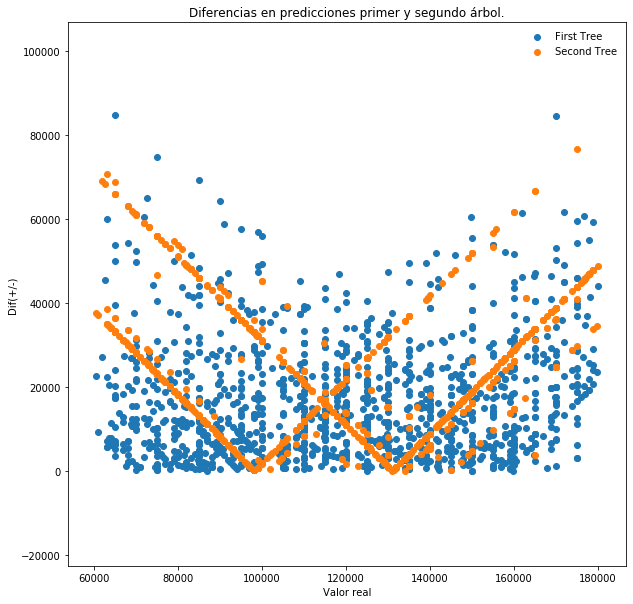

In [24]:
x = list(predicciones2.sort_values(by='Valor real')['Valor real'])
y = list(predicciones2.sort_values(by='Valor real')['Dif(+/-)'])
y2 = list(predicciones1.sort_values(by='Valor real')['Dif(+/-)'])
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x,y, label="First Tree")
ax.scatter(x,y2, label = "Second Tree")
plt.xlabel('Valor real')
plt.ylabel('Dif(+/-)')
ax.axis('equal')
ax.legend(frameon= False)
plt.title("Diferencias en predicciones primer y segundo árbol.")
plt.show()

Se aprecia entonces que el segundo árbol predice valores con menor diferencia respecto al valor real. Su mejor rendimiento se encuentra en el intervalo `_USD100,000 - USD130,000_`.